In [1]:
###### PROJECT CODE ######

In [ ]:
###1 CSFD

In [ ]:
#300 top rated films by csfd

In [6]:
from requests import get
url = 'https://www.csfd.cz/zebricky/nejoblibenejsi-filmy/?show=complete'
response = get(url)
print(response.text[:500])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML+RDFa 1.0//EN" "http://www.w3.org/MarkUp/DTD/xhtml-rdfa-1.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="cs" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://developers.facebook.com/schema/">
<head>
	<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
	<meta name="description" content="ČSFD.cz">
	<meta name="theme-color" content="#bb0011">


	<title>Žebříčky | ČSFD.cz</title>

	<link rel="shortcut icon" href="htt


In [9]:
from bs4 import BeautifulSoup


In [10]:
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [ ]:
#aggregating data: name of the film and release year

In [11]:
movie_containers = html_soup.find_all('td', class_ = 'film')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
300


In [ ]:
##aggregating data: csfd rating

In [16]:
movie_ratings = html_soup.find_all('td', class_ = 'average')
print(type(movie_ratings))
print(len(movie_ratings))

<class 'bs4.element.ResultSet'>
300


In [101]:
##aggregating data: fans number

In [17]:
fans_number = html_soup.find_all('td', class_ = 'count')
print(type(fans_number))
print(len(fans_number))

<class 'bs4.element.ResultSet'>
300


In [ ]:
##aggregating data: order of the films

In [18]:
favourite_order = html_soup.find_all('td', class_ = 'order')
print(type(favourite_order))
print(len(favourite_order))

<class 'bs4.element.ResultSet'>
300


In [19]:
## Lists to store the scraped data in
names = []
years = []
csfd_ratings = []
fans = []

for container in movie_containers:
    
       # name of the film
        name = container.a.text
        names.append(name)
        # release year
        year = container.find('span', class_ = 'film-year').text
        years.append(year)


In [20]:
for container in movie_ratings:
        # The CSFD rating
        csfd = container.text
        csfd_ratings.append(csfd)


In [21]:
for container in fans_number:
        # The number of fans
        fan = container.text
        fans.append(fan)

In [ ]:
#table creation

In [44]:
import pandas as pd
movie_ratings = pd.DataFrame({'Movie': names,
                       'Year': years,
                       'CSFD rating': csfd_ratings,
                      'Fans number': fans
                       })
print(movie_ratings.info())
movie_ratings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
Movie          300 non-null object
Year           300 non-null object
CSFD rating    300 non-null object
Fans number    300 non-null object
dtypes: object(4)
memory usage: 9.5+ KB
None


,Movie,Year,CSFD rating,Fans number
0,Forrest Gump,(1994),"94,5%",19328 fanoušků
1,Vykoupení z věznice Shawshank,(1994),"95,3%",17950 fanoušků
2,Pulp Fiction: Historky z podsvětí,(1994),"90,6%",16022 fanoušků
3,Temný rytíř,(2008),"90,2%",10886 fanoušků
4,Pán prstenů: Společenstvo Prstenu,(2001),"90,4%",10057 fanoušků
5,Počátek,(2010),"88,6%",9083 fanoušků
6,Zelená míle,(1999),"92,8%",8409 fanoušků
7,Matrix,(1999),"90,1%",8201 fanoušků
8,Pán prstenů: Návrat krále,(2003),"90,3%",8119 fanoušků
9,Pelíšky,(1999),"91,2%",7007 fanoušků


In [45]:
#examing the data and cleaning the data
movie_ratings['Year'].unique()

array(['(1994)', '(2008)', '(2001)', '(2010)', '(1999)', '(2003)',
       '(1972)', '(2011)', '(1995)', '(2002)', '(2009)', '(1975)',
       '(2000)', '(1991)', '(2012)', '(2014)', '(2006)', '(1993)',
       '(1979)', '(2005)', '(1998)', '(2007)', '(1997)', '(1968)',
       '(1996)', '(1977)', '(1980)', '(2013)', '(2004)', '(1986)',
       '(1985)', '(1971)', '(1987)', '(1966)', '(1976)', '(1984)',
       '(1983)', '(2016)', '(1988)', '(1990)', '(1974)', '(1982)',
       '(1957)', '(1989)', '(2018)', '(1992)', '(2015)', '(1981)',
       '(1961)', '(1959)', '(1953)', '(2019)', '(1960)', '(1973)',
       '(2017)', '(1969)'], dtype=object)

In [46]:
movie_ratings['CSFD rating'].unique()

array(['94,5%', '95,3%', '90,6%', '90,2%', '90,4%', '88,6%', '92,8%',
       '90,1%', '90,3%', '91,2%', '91,8%', '91,4%', '88,1%', '92,3%',
       '88,3%', '82,3%', '92,6%', '85,8%', '90,7%', '82,6%', '87,6%',
       '86,2%', '84,8%', '87,4%', '84,1%', '87,8%', '92,4%', '84,4%',
       '87,9%', '89,6%', '87,3%', '89,1%', '85,7%', '88,0%', '86,3%',
       '87,0%', '81,1%', '89,7%', '84,6%', '83,5%', '89,5%', '81,9%',
       '86,9%', '81,6%', '84,0%', '82,8%', '89,3%', '86,7%', '86,4%',
       '88,2%', '83,6%', '88,8%', '77,2%', '77,4%', '78,2%', '82,7%',
       '80,1%', '84,7%', '90,0%', '86,5%', '85,1%', '87,2%', '88,7%',
       '79,8%', '80,9%', '78,8%', '80,7%', '66,6%', '86,8%', '84,2%',
       '81,0%', '88,4%', '86,1%', '78,4%', '90,9%', '81,4%', '89,0%',
       '81,7%', '77,0%', '83,0%', '87,1%', '80,2%', '78,7%', '86,6%',
       '89,4%', '77,5%', '77,7%', '79,0%', '79,6%', '80,4%', '80,8%',
       '85,5%', '51,9%', '80,6%', '72,2%', '73,2%', '87,5%', '80,0%',
       '88,9%', '82,

In [47]:
#removing %
movie_ratings.loc[:, 'CSFD rating'] = movie_ratings['CSFD rating'].str.strip('%')

In [48]:
#as float
movie_ratings.loc[:, 'CSFD rating'] = movie_ratings['CSFD rating'].str.replace(',','.').astype(float)

In [49]:
movie_ratings['CSFD rating'].head(3)

0    94.5
1    95.3
2    90.6
Name: CSFD rating, dtype: float64

In [50]:
movie_ratings.loc[:, 'Year'] = movie_ratings['Year'].str[-5:-1].astype(int)

In [51]:
movie_ratings['Year'].head(3)

0    1994
1    1994
2    1994
Name: Year, dtype: int32

In [52]:
#removing 'fanoušků'
movie_ratings.loc[:, 'Fans number'] = movie_ratings['Fans number'].str.strip('fanoušků')

In [53]:
movie_ratings['Fans number'].head(3)

0    19328 
1    17950 
2    16022 
Name: Fans number, dtype: object

In [54]:
#as integer
movie_ratings.loc[:, 'Fans number'] = movie_ratings['Fans number'].astype(int)

In [55]:
movie_ratings['Fans number'].head(3)

0    19328
1    17950
2    16022
Name: Fans number, dtype: int32

In [68]:
movie_ratings.describe().loc[['min', 'max'], ['CSFD rating', 'Fans number', 'Year']]

,CSFD rating,Fans number,Year
min,51.9,595.0,1953.0
max,96.1,19328.0,2019.0


In [57]:
#Hence from the top ranked 300 films, the best CSFD rating is 96.1% and lowest is 51.9%.

In [58]:
from sklearn import preprocessing
import numpy as np

In [43]:
#normalizing csfd rating and number of fans in order to compare distributions
column_names_to_normalize = ['Fans number', 'CSFD rating']
x = movie_ratings[column_names_to_normalize].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
movie_ratings_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = movie_ratings.index)
movie_ratings[column_names_to_normalize] = movie_ratings_temp

In [131]:
movie_ratings

,movie,year,csfd,fans number
0,Forrest Gump,1994,0.963801,1.000000
1,Vykoupení z věznice Shawshank,1994,0.981900,0.926387
2,Pulp Fiction: Historky z podsvětí,1994,0.875566,0.823520
3,Temný rytíř,2008,0.866516,0.549351
4,Pán prstenů: Společenstvo Prstenu,2001,0.871041,0.505205
5,Počátek,2010,0.830317,0.453104
6,Zelená míle,1999,0.925339,0.417232
7,Matrix,1999,0.864253,0.406021
8,Pán prstenů: Návrat krále,2003,0.868778,0.401644
9,Pelíšky,1999,0.889140,0.342284


In [59]:
import matplotlib.pyplot as plt

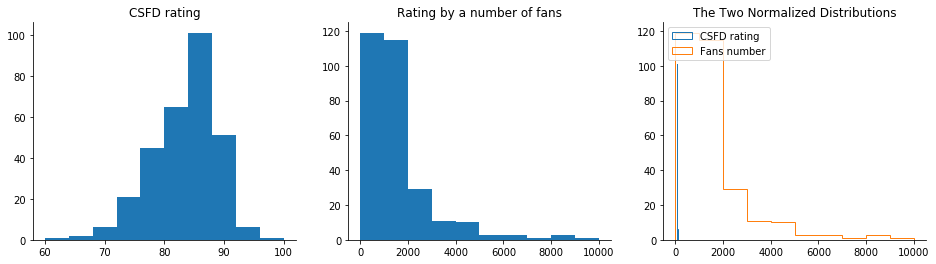

In [66]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes

ax1.hist(movie_ratings['CSFD rating'], bins = 10, range = (60,100)) # bin range = 1
ax1.set_title('CSFD rating')

ax2.hist(movie_ratings['Fans number'], bins = 10, range = (0,10000)) # bin range = 10
ax2.set_title('Number of fans distribution')

ax3.hist(movie_ratings['CSFD rating'], bins = 10, range = (60,100), histtype = 'step')
ax3.hist(movie_ratings['Fans number'], bins = 10, range = (0,10000), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

In [67]:
####IMDB

In [ ]:
#In order for us to have the most comparable list of fims from IMDB page with respect to CSFD page, we employ advanced search.
#From the CSFD list we know, that the oldest film in the top rated films list is from 1953, hence we contrain the IMDB search to an interval 1.1.1953 - 1.1.2019.
#Furthermore, the list is sorted by the number of votes and in a descending order.

In [94]:
from requests import get
url3 = 'https://www.imdb.com/search/title?release_date=1953-01-01,2019-01-01&sort=num_votes,desc&start=01&ref_=adv_nxt'
response = get(url3)
print(response.text[:500])





<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle"


In [95]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [96]:
movie_containers3 = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers3))
print(len(movie_containers3))

<class 'bs4.element.ResultSet'>
50


In [140]:
#First 50 movies
# Lists to store the scraped data in
names3 = []
years3 = []
imdb_ratings3 = []
metascores3 = []
votes3 = []

for container in movie_containers3:
# If the movie has Metascore, then extract:
       if container.find('div', class_ = 'ratings-metascore') is not None:
# The name
        name3 = container.h3.a.text
        names3.append(name3)
# The year
        year3 = container.h3.find('span', class_ = 'lister-item-year').text
        years3.append(year3)
# The IMDB rating
        imdb3 = float(container.strong.text)
        imdb_ratings3.append(imdb3)
# The Metascore
        m_score3 = container.find('span', class_ = 'metascore').text
        metascores3.append(int(m_score3))
# The number of votes
        vote3 = container.find('span', attrs = {'name':'nv'})['data-value']
        votes3.append(int(vote3))

In [141]:
import pandas as pd
test_df3 = pd.DataFrame({'Movie': names3,
'Year': years3,
'IMDB rating': imdb_ratings3,
'Metascore': metascores3,
'Number of votes': votes3
})
print(test_df3.info())
test_df3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
Movie              48 non-null object
Year               48 non-null object
IMDB rating        48 non-null float64
Metascore          48 non-null int64
Number of votes    48 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.0+ KB
None


,Movie,Year,IMDB rating,Metascore,Number of votes
0,Vykoupení z věznice Shawshank,(1994),9.3,80,2099198
1,Temný rytíř,(2008),9.0,84,2065547
2,Počátek,(2010),8.8,74,1839717
3,Klub rváčů,(1999),8.8,66,1678367
4,Pulp Fiction: Historky z podsvětí,(1994),8.9,94,1641438
5,Forrest Gump,(1994),8.8,82,1610954
6,Pán prstenů: Společenstvo prstenu,(2001),8.8,92,1510279
7,Matrix,(1999),8.7,73,1508377
8,Pán prstenů: Návrat krále,(2003),8.9,94,1494416
9,Kmotr,(1972),9.2,100,1441112


In [ ]:
#As not every film has metascore, in order to have films with both of these ratings, we exclude those who do not have the metascore.


In [142]:
interval = [str(i) for i in [1,51,101,151,201,251,301]]


In [143]:
#Apparently, IMDB translates some films' names into Czech. 
#As not all films are translated, we will keep this list of films in English language.
headers = {"Accept-Language": "en-US, en;q=0.5"} 

In [144]:
#IMDB offers only 50 outputs per page. 
#Thus we need to employ loop function in order to have a relatively same number of observations from both servers.
#Next step takes approximately 3mins for computer to process.

In [145]:
# The lists to store data in
names3 = []
years3 = []
imdb_ratings3 = []
metascores3 = []
votes3 = []

#The loop
start_time = time()
requests = 0

for start in interval:

        # Get request
        response = get('https://www.imdb.com/search/title?release_date=1953-01-01,2019-01-01&sort=num_votes,desc&start=' + start, headers = headers)
        
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Selected all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        for container in mv_containers:
           # # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name3 = container.h3.a.text
                names3.append(name3)

                # Scrape the year
                year3 = container.h3.find('span', class_ = 'lister-item-year').text
                years3.append(year3)

                # Scrape the IMDB rating
                imdb3 = float(container.strong.text)
                imdb_ratings3.append(imdb3)

                # Scrape the Metascore
                m_score3 = container.find('span', class_ = 'metascore').text
                metascores3.append(int(m_score3))

                # Scrape the number of votes
                vote3 = container.find('span', attrs = {'name':'nv'})['data-value']
                votes3.append(int(vote3))

In [146]:
#list
movie_ratings3 = pd.DataFrame({'Movie': names3,
'Year': years3,
'IMDB rating': imdb_ratings3,
'Metascore': metascores3,
'Number of votes': votes3
})
print(movie_ratings3.info())
movie_ratings3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 5 columns):
Movie              335 non-null object
Year               335 non-null object
IMDB rating        335 non-null float64
Metascore          335 non-null int64
Number of votes    335 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 13.2+ KB
None


,Movie,Year,IMDB rating,Metascore,Number of votes
0,The Shawshank Redemption,(1994),9.3,80,2099198
1,The Dark Knight,(2008),9.0,84,2065547
2,Inception,(2010),8.8,74,1839717
3,Fight Club,(1999),8.8,66,1678367
4,Pulp Fiction,(1994),8.9,94,1641438
5,Forrest Gump,(1994),8.8,82,1610954
6,The Lord of the Rings: The Fellowship of the Ring,(2001),8.8,92,1510279
7,The Matrix,(1999),8.7,73,1508377
8,The Lord of the Rings: The Return of the King,(2003),8.9,94,1494416
9,The Godfather,(1972),9.2,100,1441112


In [ ]:
#year to integer

In [148]:
movie_ratings3.loc[:, 'Year'] = movie_ratings3['Year'].str[-5:-1].astype(int)

In [149]:
movie_ratings3['Year'].head(3)

0    1994
1    2008
2    2010
Name: Year, dtype: int32

In [150]:
#normalizing IMDB rating so they are comparable with CSFD rating and Metascore

In [151]:
movie_ratings3['Normalized IMDB rating'] = movie_ratings3['IMDB rating'] * 10

In [152]:
movie_ratings3.head(5)

,Movie,Year,IMDB rating,Metascore,Number of votes,Normalized IMDB rating
0,The Shawshank Redemption,1994,9.3,80,2099198,93.0
1,The Dark Knight,2008,9.0,84,2065547,90.0
2,Inception,2010,8.8,74,1839717,88.0
3,Fight Club,1999,8.8,66,1678367,88.0
4,Pulp Fiction,1994,8.9,94,1641438,89.0


In [153]:
movie_ratings3 = movie_ratings3[['Movie', 'Year', 'IMDB rating','Normalized IMDB rating', 'Metascore', 'Number of votes']]

In [154]:
movie_ratings3.head(5)

,Movie,Year,IMDB rating,Normalized IMDB rating,Metascore,Number of votes
0,The Shawshank Redemption,1994,9.3,93.0,80,2099198
1,The Dark Knight,2008,9.0,90.0,84,2065547
2,Inception,2010,8.8,88.0,74,1839717
3,Fight Club,1999,8.8,88.0,66,1678367
4,Pulp Fiction,1994,8.9,89.0,94,1641438


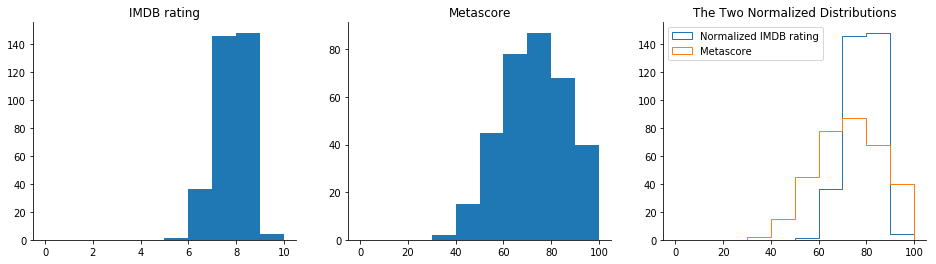

In [155]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(movie_ratings3['IMDB rating'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')
ax2.hist(movie_ratings3['Metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')
ax3.hist(movie_ratings3['Normalized IMDB rating'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings3['Metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

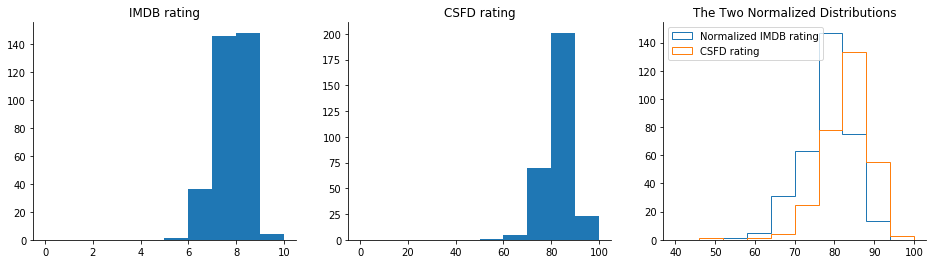

In [158]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax4, ax5, ax6 = fig.axes
ax4.hist(movie_ratings3['IMDB rating'], bins = 10, range = (0,10)) # bin range = 1
ax4.set_title('IMDB rating')
ax5.hist(movie_ratings['CSFD rating'], bins = 10, range = (0,100)) # bin range = 10
ax5.set_title('CSFD rating')
ax6.hist(movie_ratings3['Normalized IMDB rating'], bins = 10, range = (40,100), histtype = 'step')
ax6.hist(movie_ratings['CSFD rating'], bins = 10, range = (40,100), histtype = 'step')
ax6.legend(loc = 'upper left')
ax6.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

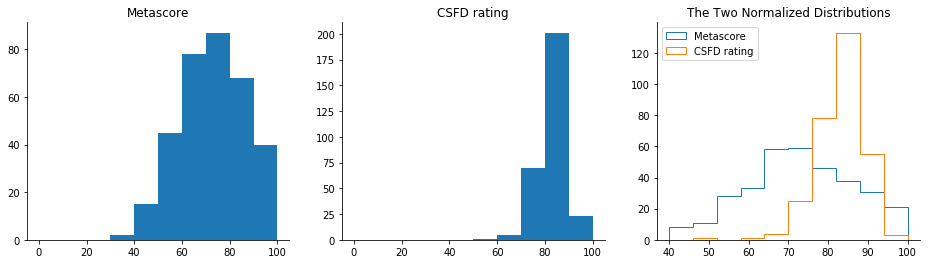

In [161]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax7, ax8, ax9 = fig.axes
ax7.hist(movie_ratings3['Metascore'], bins = 10, range = (0,100)) 
ax7.set_title('Metascore')
ax8.hist(movie_ratings['CSFD rating'], bins = 10, range = (0,100)) 
ax8.set_title('CSFD rating')
ax9.hist(movie_ratings3['Metascore'], bins = 10, range = (40,100), histtype = 'step')
ax9.hist(movie_ratings['CSFD rating'], bins = 10, range = (40,100), histtype = 'step')
ax9.legend(loc = 'upper left')
ax9.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

In [162]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\uzivatel\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


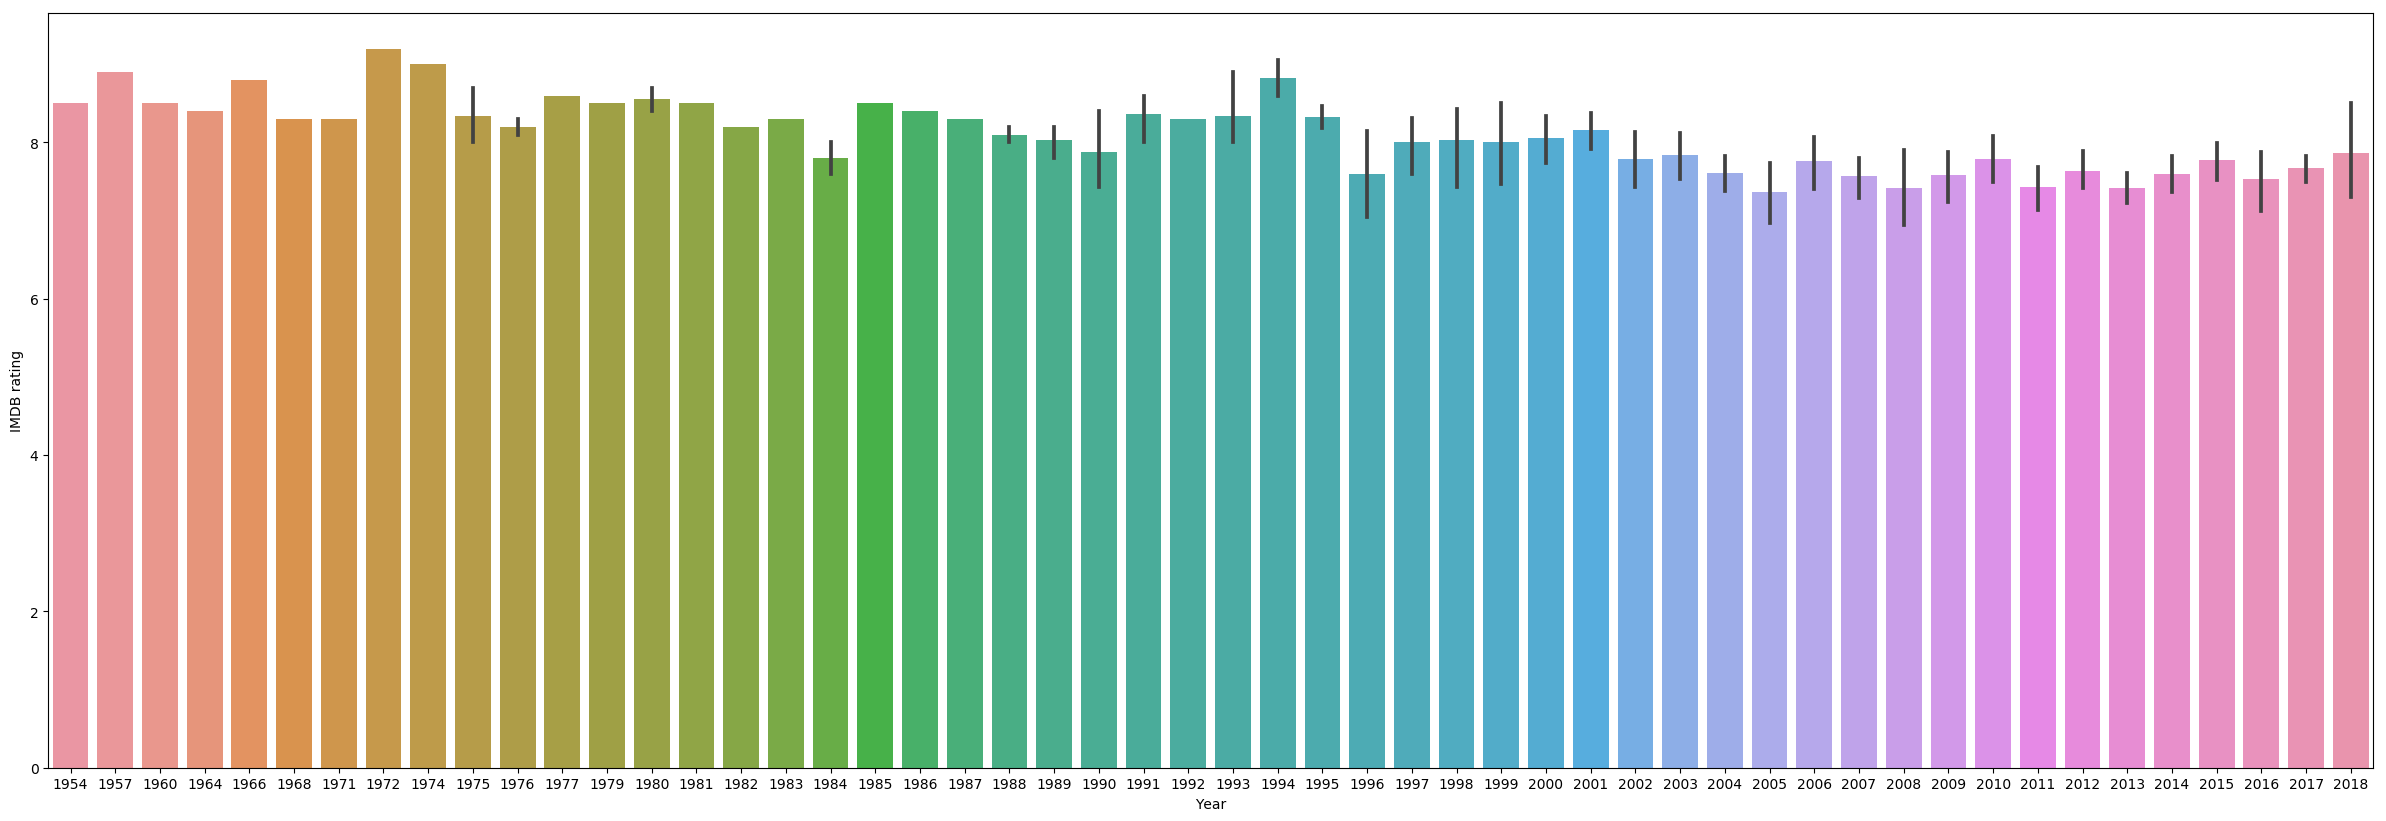

In [164]:
plt.figure(figsize=[30,10], dpi=100)
sns.barplot(x='Year', y='IMDB rating', data=movie_ratings3)

Text(0.5, 1.0, 'Number of votes vs. IMDB rating')

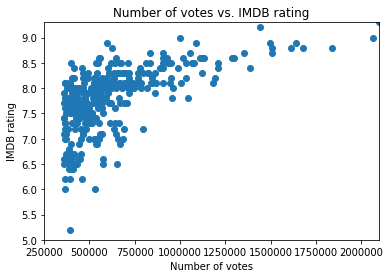

In [174]:
plt.scatter(movie_ratings3['Number of votes'], movie_ratings3['IMDB rating'])

# change axis labels
plt.xlabel('Number of votes')
plt.ylabel('IMDB rating')

# set axis limits
plt.xlim([250000, max(movie_ratings3['Number of votes'])])
plt.ylim([5, max(movie_ratings3['IMDB rating'])])

# add a title
plt.title('Number of votes vs. IMDB rating')

